In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
sub=pd.read_csv("/content/sample_submission_wyi0h0z.csv")

In [ ]:
test=pd.read_csv("/content/Test_LqhgPWU.csv")

In [ ]:
train=pd.read_csv("/content/Train_aBjfeNk.csv")
train1=pd.read_csv("/content/Train_aBjfeNk.csv")

In [ ]:
train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,endco
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,3
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A,0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,1
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,1
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D,3
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D,3
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D,3
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B,1


In [ ]:
train["Spending_Score"].value_counts()

Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64

In [ ]:
train1["Var_1"]=train["Var_1"].map({"Cat_1":1,
                                    "Cat_2":2,
                                    "Cat_3":3,
                                    "Cat_4":4,
                                    "Cat_5":5,
                                    "Cat_6":6})

In [ ]:
train1["Gender"]=train1["Gender"].map({"Male":1,
                             "Female":0
})

In [ ]:
train1["Ever_Married"]=train1["Ever_Married"].map({"Yes":1,
                             "No":0
})

In [ ]:
train1["Graduated"]=train1["Graduated"].map({"Yes":1,
                             "No":0
})

In [ ]:
train1["Profession"]=train1["Profession"].map({"Artist":1,
                                               "Healthcare":2,
                                               "Entertainment":3,
                                               "Engineer":4,
                                               "Doctor":5,
                                               "Lawyer":6,
                                               "Executive":7,
                                               "Marketing":8,
                                               "Homemaker":9})

In [ ]:
train1["Spending_Score"]=train1["Spending_Score"].map({"Low":0,
                                                       "Average":1,
                                                       "High":2})

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train["endco"]=le.fit_transform(train["Segmentation"])

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
x=imputer.fit_transform(train1)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(x)

In [ ]:
train["knn"]=kmeans.labels_

In [ ]:
train[100:110]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,endco,knn
100,464144,Male,Yes,60,Yes,Artist,0.0,Average,4.0,Cat_6,C,2,0
101,466911,Male,Yes,68,No,Executive,1.0,High,7.0,Cat_6,B,1,3
102,462806,Male,Yes,52,No,Artist,0.0,Low,3.0,Cat_4,A,0,1
103,463426,Male,Yes,38,No,Executive,0.0,High,5.0,Cat_6,A,0,0
104,464065,Female,Yes,35,Yes,Healthcare,10.0,Low,2.0,Cat_6,B,1,0
105,462979,Male,No,18,No,Doctor,1.0,Low,2.0,Cat_6,D,3,1
106,462834,Male,Yes,30,Yes,Homemaker,3.0,Low,2.0,Cat_1,D,3,1
107,460764,Male,No,86,No,Lawyer,1.0,Low,1.0,Cat_6,D,3,2
108,466466,Female,NaN,19,No,Healthcare,6.0,Low,5.0,Cat_3,D,3,3
109,460185,Male,No,25,No,Healthcare,9.0,Low,3.0,Cat_6,D,3,2


In [ ]:
train.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

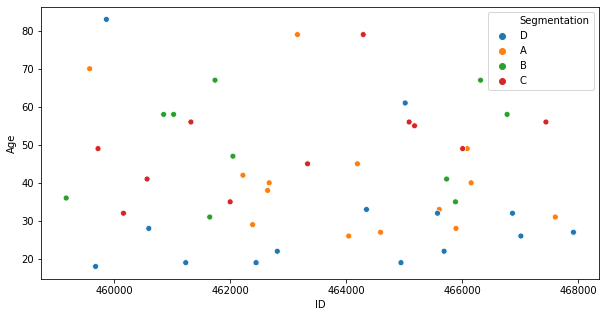

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="ID",y="Age",data=train1,hue="Segmentation")

# BASELINE

In [ ]:
y=train["endco"]

In [ ]:
data=pd.concat([train,test],ignore_index=True)

In [ ]:
df=pd.get_dummies(data)

NameError: ignored

In [ ]:
df.isnull().sum()

ID                             0
Age                            0
Work_Experience             1098
Family_Size                  448
Gender_Female                  0
Gender_Male                    0
Ever_Married_No                0
Ever_Married_Yes               0
Graduated_No                   0
Graduated_Yes                  0
Profession_Artist              0
Profession_Doctor              0
Profession_Engineer            0
Profession_Entertainment       0
Profession_Executive           0
Profession_Healthcare          0
Profession_Homemaker           0
Profession_Lawyer              0
Profession_Marketing           0
Spending_Score_Average         0
Spending_Score_High            0
Spending_Score_Low             0
Var_1_Cat_1                    0
Var_1_Cat_2                    0
Var_1_Cat_3                    0
Var_1_Cat_4                    0
Var_1_Cat_5                    0
Var_1_Cat_6                    0
Var_1_Cat_7                    0
dtype: int64

In [ ]:
df.drop("ID",inplace=True,axis=1)

In [ ]:
trainxx=df[:8068]
testxx=df[8068:]

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
target=le.fit_transform(y)
from sklearn.model_selection import cross_val_score

In [ ]:
import lightgbm as lgb
model_lgb = lgb.LGBMClassifier(n_estimators = 1000, min_samples_in_leaf = 10, learning_rate = .02)
scores = cross_val_score(model_lgb, trainxx,target, cv = 3, scoring = "accuracy")
scores.mean()

0.5330941192789201

In [ ]:
from lightgbm import LGBMClassifier
lgb=LGBMClassifier()
scores = cross_val_score(lgb, trainxx,target, cv = 3, scoring = "accuracy")
scores.mean()

0.534704793451498

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
scores = cross_val_score(xgb, train1,y, cv = 3, scoring = "accuracy")
scores.mean()

0.5329690514800994

In [ ]:
pip install catboost

     |████████████████████████████████| 64.8MB 59kB/s 


In [ ]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier()
scores = cross_val_score(cat, trainxx,target, cv = 3, scoring = "accuracy")
scores.mean()

Learning rate set to 0.086215
0:	learn: 1.3436412	total: 8.24ms	remaining: 8.23s
1:	learn: 1.3079861	total: 16.1ms	remaining: 8.06s
2:	learn: 1.2781176	total: 25.7ms	remaining: 8.56s
3:	learn: 1.2520615	total: 33ms	remaining: 8.22s
4:	learn: 1.2301061	total: 40.5ms	remaining: 8.07s
5:	learn: 1.2127723	total: 48.2ms	remaining: 7.99s
6:	learn: 1.1984138	total: 55.7ms	remaining: 7.89s
7:	learn: 1.1837221	total: 63.4ms	remaining: 7.86s
8:	learn: 1.1702667	total: 71ms	remaining: 7.82s
9:	learn: 1.1582577	total: 78.4ms	remaining: 7.76s
10:	learn: 1.1484238	total: 85.8ms	remaining: 7.72s
11:	learn: 1.1391692	total: 93.3ms	remaining: 7.68s
12:	learn: 1.1305182	total: 101ms	remaining: 7.65s
13:	learn: 1.1224795	total: 108ms	remaining: 7.62s
14:	learn: 1.1161735	total: 116ms	remaining: 7.59s
15:	learn: 1.1102487	total: 123ms	remaining: 7.56s
16:	learn: 1.1042399	total: 130ms	remaining: 7.52s
17:	learn: 1.0991216	total: 137ms	remaining: 7.49s
18:	learn: 1.0941721	total: 145ms	remaining: 7.47s
19:

0.5303658993476107

In [ ]:
data.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
dtype: int64

In [ ]:
data.Ever_Married.value_counts()


Yes    6163
No     4342
Name: Ever_Married, dtype: int64

In [ ]:
data.Ever_Married=data.Ever_Married.fillna("Yes")

In [ ]:
data.Graduated.value_counts()

Yes    6570
No     4023
Name: Graduated, dtype: int64

In [ ]:
data.Graduated=data.Graduated.fillna("Yes")

In [ ]:
data.Profession.value_counts()

Artist           3318
Healthcare       1750
Entertainment    1250
Engineer          935
Doctor            930
Lawyer            844
Executive         775
Marketing         403
Homemaker         328
Name: Profession, dtype: int64

In [ ]:
data.Profession=data.Profession.fillna("Artist")

In [ ]:
data.Work_Experience.value_counts()

1.00     3127
0.00     3087
9.00      613
8.00      612
2.00      373
4.00      346
3.00      337
5.00      270
6.00      265
7.00      256
14.00      66
11.00      64
10.00      64
12.00      60
13.00      57
Name: Work_Experience, dtype: int64

In [ ]:
data.Work_Experience=data.Work_Experience.fillna(1.0)

In [ ]:
data.Family_Size.value_counts()

2.00    3158
1.00    1965
3.00    1952
4.00    1823
5.00     812
6.00     290
7.00     122
8.00      65
9.00      60
Name: Family_Size, dtype: int64

In [ ]:
data.Family_Size=data.Family_Size.fillna(2.0)

In [ ]:
data.Var_1.value_counts()

Cat_6    6910
Cat_4    1475
Cat_3    1089
Cat_2     563
Cat_7     269
Cat_1     167
Cat_5     114
Name: Var_1, dtype: int64

In [ ]:
data.Var_1=data.Var_1.fillna("Cat_6")

In [ ]:
data.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [ ]:
data=pd.get_dummies(data)

In [ ]:
yy=pd.get_dummies(data["ID"])

In [ ]:
df=pd.concat([data,yy],axis=1)

In [ ]:
trainxx=df[0:8068]
testxx=df[8068:]

In [ ]:
trainxx

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,22,1.00,4.00,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
1,38,1.00,3.00,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,67,1.00,1.00,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,67,0.00,2.00,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,40,1.00,6.00,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,22,0.00,7.00,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
8064,35,3.00,4.00,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
8065,33,1.00,1.00,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
8066,27,1.00,4.00,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
target=le.fit_transform(y)

In [ ]:
target

array([3, 0, 1, ..., 3, 1, 1])

In [ ]:
pip install lazypredict

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(trainxx,target,test_size=.5,random_state =101)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 30/30 [00:12<00:00,  2.45it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.47,0.45,None,0.45,0.56
AdaBoostClassifier,0.45,0.44,None,0.43,0.24
LGBMClassifier,0.45,0.44,None,0.44,0.43
SVC,0.45,0.43,None,0.42,1.20
RandomForestClassifier,0.42,0.41,None,0.42,0.71
BaggingClassifier,0.42,0.41,None,0.42,0.13
LabelSpreading,0.41,0.40,None,0.41,1.31
LabelPropagation,0.41,0.40,None,0.41,1.03
GaussianNB,0.42,0.40,None,0.38,0.02
